<a href="https://colab.research.google.com/github/fadillahjagapratama/Post-Test-2_DM/blob/main/2109116065_Fadillah_Jaga_Pratama_Post_Test_2_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fadillahjagapratama/Dataset_DM/main/dataset_market_basket.csv") # df untuk membaca file dataset dengan method read_csv
# Lihat Data Tabular item pada variavel df
df

,"whole milk,pastry,salty snack"
0,"sausage,whole milk,semi-finished bread,yogurt"
1,"soda,pickled vegetables"
2,"canned beer,misc. beverages"
3,"sausage,hygiene articles"
4,"sausage,whole milk,rolls/buns"
5,"whole milk,soda"
6,"frankfurter,soda,whipped/sour cream"
7,"frankfurter,curd"
8,"beef,white bread"
9,"butter,whole milk"


In [ ]:
df.sum() # hitung jumlah nilai di setiap kolom

whole milk,pastry,salty snack    sausage,whole milk,semi-finished bread,yogurts...
dtype: object

In [ ]:
df.columns # untuk mengetahui kolom yang ada pada dataset

Index(['whole milk,pastry,salty snack'], dtype='object')

In [ ]:
from itertools import permutations #Library untuk buat kombinasi barang
rules = list(permutations(df.columns, 2)) # untuk menyimpan seluruh kemungkinan kombinasi barang
rules # untuk menampilkan keseluruhan hasil kombinasi

[]

In [ ]:
# Menghitung kemunculan kombinasi yang ada pada dataset
rule_baru = [] # Menyimpan data dalam bentuk list
for rule in rules: # Mengulangi pembacaan dataset
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0: # Menentukan apakah kombinasi tersebut ada atau tidak
    rule_baru.append(rule) # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
rule_baru # Menampilkan hasil

[]

In [ ]:
hitung = {} # Menyimpan data dalam bentuk dictionary
for rule in rule_baru:  # Mengulangi pembacaan dataset
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  hitung[str(rule)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary
hitung # Menampilkan hasil

{}

In [ ]:
# Melihat banyak transaksi
len(df)

18

In [ ]:
# List support
# 
for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  print(f"{item} support = {ab/len(df)*100}%") # Menghitung support pada tiap tiap kombinasi item dan menampilkannya

In [ ]:
# List Confidens

for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%") # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

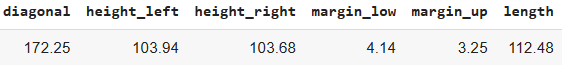
<!-- 1412 -->

### Collect and Describe Data

In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/fadillahjagapratama/Dataset_DM/main/deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


### 1. Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [ ]:
# Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

from sklearn.metrics.pairwise import euclidean_distances

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = euclidean_distances(df2[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']], new_data)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])


Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


### 1. Menambahkan Kolom Jarak

In [ ]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,distance
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [ ]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)

# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(df2)))
data_terdekat = df2.sort_values('distance').head(k)

# Menampilkan data terdekat
print(data_terdekat)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


### 3.  Menentukan hasil prediksi berdasarkan label terbanyak

In [ ]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True ")
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 
Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True





# (3) Analisis

> Nama : Fadillah Jaga Pratama

> Nim : 2109116065


In [ ]:
! pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 

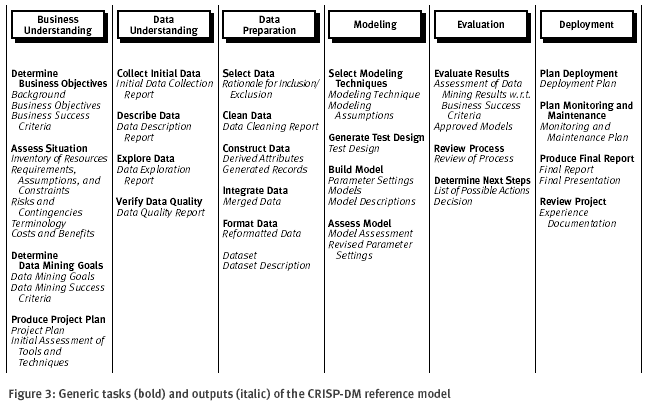

In [ ]:
from PIL import Image
img = Image.open('DatMin.png')
img

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Analisis

### Judul : Cause of Death in Indonesia
### Business Understanding

Indonesia adalah negara dengan populasi terbesar keempat di dunia, dengan populasi mencapai lebih dari 270 juta jiwa pada tahun 2021. Oleh karena itu, masalah kesehatan masyarakat menjadi isu yang sangat penting di Indonesia. Untuk memahami masalah kesehatan masyarakat di Indonesia, penting untuk memahami penyebab kematian di Indonesia.

Dataset "Cause of Death in Indonesia" di Kaggle berisi data tentang penyebab kematian di Indonesia selama periode 2010-2019. Dataset ini dapat memberikan wawasan yang bermanfaat untuk berbagai pemangku kepentingan, seperti pemerintah, rumah sakit, lembaga kesehatan, dan masyarakat umum.

Pemerintah dapat menggunakan data ini untuk merencanakan kebijakan kesehatan dan program pencegahan penyakit yang lebih efektif. Rumah sakit dan lembaga kesehatan dapat menggunakan data ini untuk memahami tren penyakit dan kematian di wilayah mereka dan memperbaiki praktik klinis mereka. Masyarakat umum dapat menggunakan data ini untuk memahami penyakit apa yang paling banyak mempengaruhi kesehatan masyarakat dan mengambil tindakan preventif yang tepat.

Analisis data ini dapat memberikan wawasan tentang penyebab kematian di Indonesia selama periode 2010-2019. Dalam analisis data ini, dapat diidentifikasi tren penyakit dan perbedaan antara jenis kelamin, kelompok umur, dan wilayah geografis.

*   Goals Perusahaan : Memberikan informasi yang akurat dan terkini  mengenai penyebab kematian di Indonesia, membantu para peneliti dan ahli kesehatan dalam memahami dan mengidentifikasi tren dan pola dalam kematian penduduk Indonesia, dan menyediakan data yang diperlukan bagi pemerintah dan organisasi non-pemerintah untuk merencanakan dan melaksanakan program kesehatan yang tepat sasaran dan efektif.

*   Tujuan Penggunaan DM : Mengidentifikasi faktor-faktor yang berkontribusi terhadap penyebab kematian tertentu, menemukan korelasi antara faktor-faktor tersebut dengan penyebab kematian, membantu dalam membuat prediksi tentang kemungkinan penyebab kematian yang lebih tinggi pada kelompok populasi tertentu, dan memberikan informasi yang dapat membantu dalam perencanaan program kesehatan yang lebih efektif dan tepat sasaran.





### Data Understanding

#### Collect Data

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/fadillahjagapratama/Dataset_DM/main/Penyebab%20Kematian%20di%20Indonesia%20yang%20Dilaporkan%20-%20Raw.csv')

#### Describe Data

In [ ]:
df3

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
1057,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
1058,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
1059,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
1060,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


In [ ]:
df3.describe()

,Year,Data Redundancy,Total Deaths
count,1062.000000,1062.000000,1062.000000
mean,2010.202448,2.932203,1194.364407
std,5.227120,2.776486,6248.983680
min,2000.000000,1.000000,0.000000
25%,2006.000000,1.000000,6.000000
50%,2009.000000,1.000000,42.000000
75%,2014.000000,4.000000,261.000000
max,2022.000000,12.000000,129171.000000


#### Penjelasan Setiap Kolom


In [ ]:
df3.info()

# Dataset ini memiliki 1062 baris data dan 8 kolom. 
# Berikut adalah penjelasan untuk masing-masing kolom:

# Kolom "Cause": kolom ini berisi penyebab dari suatu peristiwa. Kolom ini bertipe data objek (string).
# Kolom "Type": kolom ini berisi jenis dari suatu peristiwa. Contohnya, apakah peristiwa tersebut adalah bencana alam, kecelakaan lalu lintas, atau kejadian lainnya. Kolom ini bertipe data objek (string).
# Kolom "Year": kolom ini berisi tahun di mana suatu peristiwa terjadi. Kolom ini bertipe data int64 (integer).
# Kolom "Data Redundancy": kolom ini berisi informasi mengenai keberadaan data yang redundan (tidak perlu atau berulang). Nilai 0 pada kolom ini menunjukkan bahwa tidak ada data yang redundan, sedangkan nilai 1 menunjukkan bahwa ada data yang redundan. Kolom ini bertipe data int64 (integer).
# Kolom "Total Deaths": kolom ini berisi jumlah total kematian akibat dari suatu peristiwa. Kolom ini bertipe data int64 (integer).
# Kolom "Source": kolom ini berisi sumber data dari suatu peristiwa. Kolom ini bertipe data objek (string).
# Kolom "Page at Source": kolom ini berisi halaman sumber data dari suatu peristiwa. Kolom ini bertipe data objek (string).
# Kolom "Source URL": kolom ini berisi URL sumber data dari suatu peristiwa. Kolom ini bertipe data objek (string).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            1062 non-null   object
 1   Type             1062 non-null   object
 2   Year             1062 non-null   int64 
 3   Data Redundancy  1062 non-null   int64 
 4   Total Deaths     1062 non-null   int64 
 5   Source           1062 non-null   object
 6   Page at Source   1060 non-null   object
 7   Source URL       1060 non-null   object
dtypes: int64(3), object(5)
memory usage: 66.5+ KB


#### Visualisasi dan Penjelasan

###### 1. Hubungan antara Jumlah Barang dan Penjualan

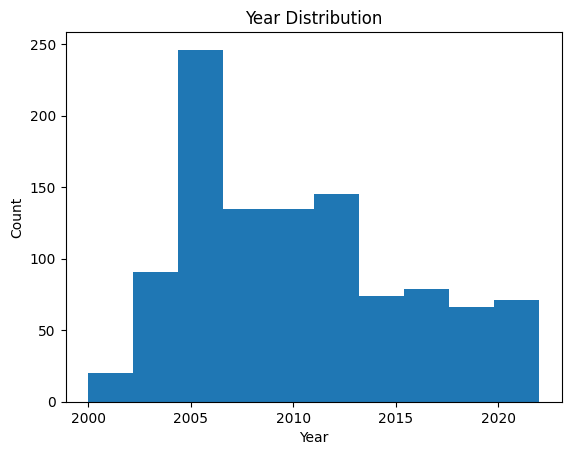

In [ ]:
import matplotlib.pyplot as plt
# Visualize Year distribution using histogram
plt.hist(df3['Year'], bins=10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Distribution')
plt.show()

# Data Preparation

#### Clean Data

In [ ]:
df3.isna().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     2
Source URL         2
dtype: int64

#### Data Reduction

In [ ]:
df3.drop(columns=["Cause"])

,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...
1057,Bencana Non Alam dan Penyakit,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
1058,Bencana Non Alam dan Penyakit,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
1059,Bencana Non Alam dan Penyakit,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
1060,Bencana Non Alam dan Penyakit,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...
